# 0 - Work with Gutenburg

In [7]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.corpus import gutenberg
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
titles = gutenberg.fileids()

## Explore Title

In [0]:
data = []

for fileid in titles:
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_paras = len(gutenberg.paras(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    data.append([fileid, num_chars, 
            num_words, num_chars/num_words, 
            num_sents, num_words/num_sents, 
            num_paras, num_words/num_paras,
            num_vocab, num_words/num_vocab])

df = pd.DataFrame(data)
df.columns = ['Title','length','words','word len','sents','sent len',
              'paragraphs','para len','vocabs','vocab repeat']
print(df)


                      Title   length    words  word len  sents   sent len  \
0           austen-emma.txt   887071   192427  4.609909   7752  24.822884   
1     austen-persuasion.txt   466292    98171  4.749794   3747  26.199893   
2          austen-sense.txt   673022   141576  4.753786   4999  28.320864   
3             bible-kjv.txt  4332554  1010654  4.286882  30103  33.573199   
4           blake-poems.txt    38153     8354  4.567034    438  19.073059   
5        bryant-stories.txt   249439    55563  4.489300   2863  19.407265   
6   burgess-busterbrown.txt    84663    18963  4.464642   1054  17.991461   
7         carroll-alice.txt   144395    34110  4.233216   1703  20.029360   
8       chesterton-ball.txt   457450    96996  4.716174   4779  20.296296   
9      chesterton-brown.txt   406629    86063  4.724783   3806  22.612454   
10  chesterton-thursday.txt   320525    69213  4.630994   3742  18.496259   
11    edgeworth-parents.txt   935158   210663  4.439118  10230  20.592669   

## Show some sentence of each Title

In [0]:
for fileid in titles:
  for idx, sent in enumerate(gutenberg.sents(fileid)):
    if idx < 5:
      print(sent)
  print('---------------------')


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']
['VOLUME', 'I']
['CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
---------------------
['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ']']
['Chapter', '1']
['Sir', 'Walter', 'Elliot', ',', 'of', 'Kellynch', 'Hall', ',', 'in', 'Somersetshire', ',', 'was', 'a', 'man', 

## Sampling

In [0]:
from gensim.utils import simple_preprocess

In [0]:
docs = []
authors = []

# max paragraph len
max_len = 200

for title in titles:
  # each title: get author
  author = title.split("-")[0]
  cur_sent = []
  
  # each sentence
  for idx, sent in enumerate(gutenberg.sents(title)):
    # skip first sent
    if idx == 0:
      continue
    
    # simple processing: lowercases, tokenizes
    sent = simple_preprocess(' '.join(sent),deacc=False, min_len=2, max_len=15)
    
    # skip sent len = 1
    if len(sent) < 2:
      continue
      
    cur_sent.extend(sent)
    
    # append data if len >= max_len
    if len(cur_sent) >= max_len:
      docs.append(cur_sent[:max_len])
      authors.append(author)
      cur_sent = []
      
  # append remain cur_sent
  if len(cur_sent) > 0:
    cur_sent.extend([''] * max_len)
    # all doc has same len = max_len
    docs.append(cur_sent[:max_len])
    authors.append(author)
    

In [12]:
df = pd.DataFrame({'author':authors, 'doc':docs})
print(df.shape)

print(df.author.value_counts())

(9334, 2)
bible          3527
austen         1593
chesterton      965
melville        953
edgeworth       748
whitman         488
milton          331
shakespeare     295
bryant          211
carroll         119
burgess          73
blake            31
Name: author, dtype: int64


In [0]:
# show some data
data = []
for auth in df.author.value_counts().keys().values:
  x = df[df.author==auth][0:5]
  for i in range(x.shape[0]):
    data.append([x[i:i+1].author.values[0],len(x[i:i+1].doc.values[0]),x[i:i+1].doc.values[0][:80]])

for s in data:
  print(s)


['bible', 200, ['the', 'old', 'testament', 'of', 'the', 'king', 'james', 'bible', 'the', 'first', 'book', 'of', 'moses', 'called', 'genesis', 'in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', 'and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from']]
['bible', 200, ['and', 'god', 'said', 'let', 'the', 'earth', 'bring', 'forth', 'grass', 'the', 'herb', 'yielding', 'seed', 'and', 'the', 'fruit', 'tree', 'yielding', 'fruit', 'after', 'his', 'kind', 'whose', 'seed', 'is', 'in', 'itself', 'upon', 'the', 'earth', 'and', 'it', 'was', 'so', 'and', 'the', 'earth', 'brought', 'forth', 'grass', 'and', 

# 0 - Word2Vec

In [0]:
from gensim.models import Word2Vec
from collections import Counter

## Word2Vec Model

In [0]:
# Set values for various parameters
size = 250    # Word vector dimensionality  
window = 5    # Context window size                                                                                    
min_count = 1    # Minimum word count                        
sample = 6e-5         # Downsample setting for frequent words
n_iter = 50

In [15]:
tokenized_corpus = df.doc.values.tolist()
print(len(tokenized_corpus))
print(len(tokenized_corpus[0]))

9334
200


In [16]:
w2v_model = Word2Vec(tokenized_corpus, size=size, 
                          window=window, min_count=min_count,
                          sample=sample, iter=n_iter)
print(w2v_model)

Word2Vec(vocab=39427, size=250, alpha=0.025)


## MODEL PARAMETER - 2

In [0]:
# MODEL PARAMETER - 2
# size = 250    # Word vector dimensionality  
# window = 5    # Context window size                                                                                    
# min_count = 1    # Minimum word count                        
# sample = 6e-5         # Downsample setting for frequent words
# n_iter = 50
# ------------------------------------
# view similar words based on gensim's model
terms = ['god','animal','king','war','knees','sun']

similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in terms}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'animal': ['abstract', 'insect', 'maddening', 'cures', 'sketching'],
 'god': ['lord', 'salvation', 'redeemer', 'unto', 'saviour'],
 'king': ['haman', 'jehoshaphat', 'esther', 'zedekiah', 'david'],
 'knees': ['kneeled', 'hinged', 'leaned', 'towel', 'knee'],
 'sun': ['moon', 'star', 'shineth', 'noonday', 'stars'],
 'war': ['battle', 'whoop', 'weapons', 'warfare', 'battles']}

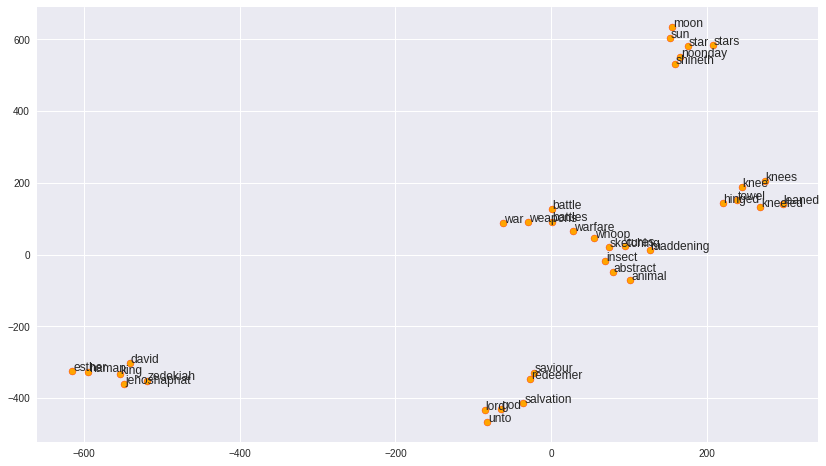

In [0]:
# Visualize similar words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


## MODEL PARAMETER - 1

In [0]:
# MODEL PARAMETER - 1
# size = 150    # Word vector dimensionality  
# window = 5    # Context window size                                                                                    
# min_count = 1    # Minimum word count                        
# sample = 1e-3         # Downsample setting for frequent words
# n_iter = 50
# ------------------------------------
# view similar words based on gensim's model
terms = ['god','animal','king','war','knees','sun']

similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in terms}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'animal': ['artist', 'boneless', 'unnatural', 'abstract', 'instinct'],
 'god': ['lord', 'salvation', 'christ', 'glory', 'gospel'],
 'king': ['pharaoh', 'kings', 'solomon', 'governor', 'esther'],
 'knees': ['shoulders', 'neck', 'shoulder', 'legs', 'elbow'],
 'sun': ['star', 'morn', 'stars', 'light', 'wind'],
 'war': ['battle', 'conspiracy', 'fight', 'engineer', 'army']}

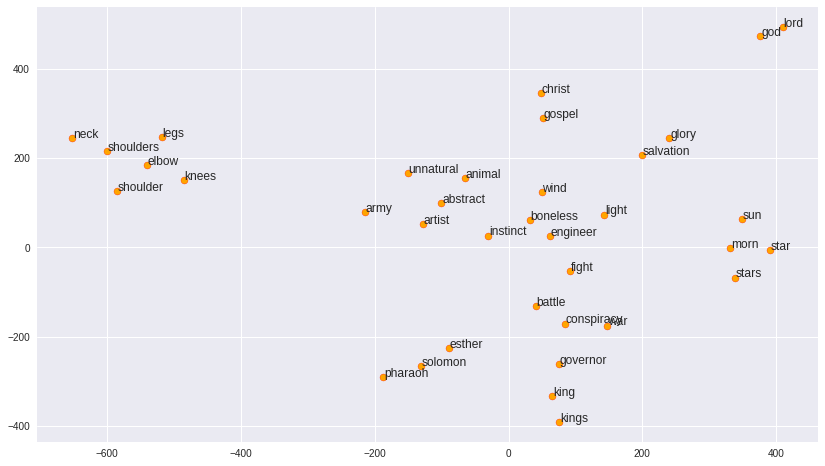

In [0]:
# Visualize similar words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


In [0]:
w2v_model['king'][:20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.2796886 , -0.01572933,  0.01650183, -0.49412015,  0.9048502 ,
       -0.51282614, -0.45804498, -0.27080664,  0.06540574, -1.0646987 ,
        0.01200043, -0.21367754,  0.38439623,  0.6134368 , -0.37545022,
        0.15470263, -0.64747995, -0.05464357, -0.24913858,  0.36230618],
      dtype=float32)

## Doc2Matrix
size: 200x250

In [0]:
# Input: doc is list of word
# Output: mat is 2D array of 200 words. each row is a vect(250) of each word
def fnDoc2Mat(doc):
  mat = []
  for word in doc:
    mat.append(w2v_model[word])
  return mat

In [18]:
df['doc2mat'] = [fnDoc2Mat(doc) for doc in df.doc.values.tolist()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


## Save data to file

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file_name = '/content/gdrive/My Drive/Classroom/textAuthorDf.csv'
df.to_csv(file_name)

In [0]:
df1 = pd.read_csv(file_name)

In [18]:
print(df1.shape)
df1.author.value_counts()

(1255, 4)


austen    1255
Name: author, dtype: int64

# 1 - CNN MODEL


```
   micro avg       0.99      0.99      0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600
```



In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Convolution2D, Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils

## Balance sampling

In [0]:
df.author.value_counts()

bible          3527
austen         1593
chesterton      965
melville        953
edgeworth       748
whitman         488
milton          331
shakespeare     295
bryant          211
carroll         119
burgess          73
blake            31
Name: author, dtype: int64

In [0]:
# Random over-sampling
# devide df into multi df base on author 
list_df = []

for auth in df.author.value_counts().keys().values:
  list_df.append(df[df.author == auth])

for dfi in list_df:
  print(dfi.shape)

(3527, 3)
(1593, 3)
(965, 3)
(953, 3)
(748, 3)
(488, 3)
(331, 3)
(295, 3)
(211, 3)
(119, 3)
(73, 3)
(31, 3)


In [0]:
# Random over-sampling
n_samp = 1000

list_df_balance = []
for dfi in list_df:
  dfi_balance = dfi.sample(n_samp, replace=True)
  list_df_balance.append(dfi_balance)
  
df4cnn = pd.concat(list_df_balance, axis=0)

In [0]:
# df after balance sample
df4cnn.author.value_counts()

whitman        1000
austen         1000
edgeworth      1000
carroll        1000
bryant         1000
melville       1000
shakespeare    1000
blake          1000
burgess        1000
chesterton     1000
bible          1000
milton         1000
Name: author, dtype: int64

## Prepare train - test

In [0]:
X = df4cnn.doc2mat.values.tolist()
y = df4cnn.author.values.tolist()

In [0]:
# 1-hot-encode label
y = pd.get_dummies(y)
class_nm = y.columns.values
y = y.values

print(class_nm)

['austen' 'bible' 'blake' 'bryant' 'burgess' 'carroll' 'chesterton'
 'edgeworth' 'melville' 'milton' 'shakespeare' 'whitman']


In [0]:
# Split Train - Test
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)

In [0]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 200, 250)
(3600, 200, 250)
(8400, 12)
(3600, 12)


In [0]:
num_classes = y_test.shape[1]

## CNN model

In [0]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
      
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
def cnnModel(num_classes):
    # Create the model
    model = Sequential()
    model.add(Convolution1D(nb_filter=1024, filter_length=1, input_shape=(200, 250)))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))    
    
    # Compile model
    epochs = 15  # >>> should be 25+
    lrate = 0.003
    decay = lrate/epochs
    
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[f1])
    
    print(model.summary())
    return model

# create our CNN model
cnn = cnnModel(num_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 200, 1024)         257024    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200, 1024)         0         
_________________________________________________________________
activation_15 (Activation)   (None, 200, 1024)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               104858112 
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 12)                6156      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(200, 250), filters=1024, kernel_size=1)`
  after removing the cwd from sys.path.


In [0]:
#     model = Sequential()
#     model.add(Convolution1D(nb_filter=1024, filter_length=1, input_shape=(200, 250)))
#     model.add(Dropout(0.4))
#     model.add(Activation('relu'))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(num_classes))
#     model.add(Activation('softmax')) 
his = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)


Train on 8400 samples, validate on 3600 samples
Epoch 1/15
8400/8400 [==============================] - 20s 2ms/step - loss: 0.6105 - f1: 0.7758 - val_loss: 0.0928 - val_f1: 0.9756
Epoch 2/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0434 - f1: 0.9923 - val_loss: 0.0709 - val_f1: 0.9796
Epoch 3/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0185 - f1: 0.9983 - val_loss: 0.0514 - val_f1: 0.9840
Epoch 4/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0102 - f1: 0.9994 - val_loss: 0.0449 - val_f1: 0.9855
Epoch 5/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0086 - f1: 0.9994 - val_loss: 0.0479 - val_f1: 0.9846
Epoch 6/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0065 - f1: 0.9996 - val_loss: 0.0436 - val_f1: 0.9847
Epoch 7/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0060 - f1: 0.9993 - val_loss: 0.0442 - val_f1: 0.9852
Epoch 8/15
8400/8400 

In [0]:
#     model = Sequential()
#     model.add(Convolution1D(nb_filter=1024, filter_length=1, input_shape=(200, 250)))
#     model.add(Dropout(0.2))
#     model.add(Activation('relu'))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(num_classes))
#     model.add(Activation('softmax')) 
his = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)


Train on 8400 samples, validate on 3600 samples
Epoch 1/15
8400/8400 [==============================] - 20s 2ms/step - loss: 0.4996 - f1: 0.8186 - val_loss: 0.0733 - val_f1: 0.9810
Epoch 2/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0178 - f1: 0.9984 - val_loss: 0.0549 - val_f1: 0.9853
Epoch 3/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0075 - f1: 0.9996 - val_loss: 0.0489 - val_f1: 0.9847
Epoch 4/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0050 - f1: 0.9998 - val_loss: 0.0479 - val_f1: 0.9845
Epoch 5/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0053 - f1: 0.9994 - val_loss: 0.0469 - val_f1: 0.9853
Epoch 6/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0032 - f1: 1.0000 - val_loss: 0.0456 - val_f1: 0.9846
Epoch 7/15
8400/8400 [==============================] - 18s 2ms/step - loss: 0.0034 - f1: 0.9998 - val_loss: 0.0446 - val_f1: 0.9860
Epoch 8/15
8400/8400 

In [0]:
# view Classification Report
y_prd = cnn.predict(X_test, batch_size=None, verbose=0, steps=None)

ar_ytest = np.asarray(np.matrix(y_test).argmax(1).T)[0]
ar_yprd = np.asarray(np.matrix(y_prd).argmax(1).T)[0]

report = classification_report(ar_ytest, ar_yprd)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       294
           1       1.00      1.00      1.00       277
           2       1.00      1.00      1.00       288
           3       1.00      0.99      1.00       308
           4       0.99      1.00      1.00       304
           5       1.00      1.00      1.00       333
           6       0.98      0.97      0.98       304
           7       0.96      0.95      0.95       324
           8       0.99      0.95      0.97       286
           9       0.99      1.00      0.99       280
          10       1.00      1.00      1.00       307
          11       0.97      0.99      0.98       295

   micro avg       0.99      0.99      0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600



In [0]:
# view Classification Report
y_prd = cnn.predict(X_train, batch_size=None, verbose=0, steps=None)

ar_y = np.asarray(np.matrix(y_train).argmax(1).T)[0]
ar_yprd = np.asarray(np.matrix(y_prd).argmax(1).T)[0]

report = classification_report(ar_y, ar_yprd)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       706
           1       1.00      1.00      1.00       723
           2       1.00      1.00      1.00       712
           3       1.00      1.00      1.00       692
           4       1.00      1.00      1.00       696
           5       1.00      1.00      1.00       667
           6       1.00      1.00      1.00       696
           7       1.00      1.00      1.00       676
           8       1.00      1.00      1.00       714
           9       1.00      1.00      1.00       720
          10       1.00      1.00      1.00       693
          11       1.00      1.00      1.00       705

   micro avg       1.00      1.00      1.00      8400
   macro avg       1.00      1.00      1.00      8400
weighted avg       1.00      1.00      1.00      8400



# 2 - SVM 

```
   micro avg       0.99      0.99      0.99      2801
   macro avg       0.97      0.96      0.97      2801
weighted avg       0.99      0.99      0.99      2801```



In [0]:
from sklearn import svm


## Prepare data

In [0]:
X = df.doc2mat.values.tolist()
y = df.author.values.tolist()

In [0]:
# import psutil
# del yy
# print(psutil.virtual_memory().percent)

# sum doc 2D array -> 1D list
X = [np.sum(x, axis=0) for x in X]

In [0]:
# Split Train - Test
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)

## SVM Model

In [39]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.003, 0.01, 0.1]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs} #, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 5)  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

{'C': 0.003}

In [43]:
df.shape

(9334, 3)

In [73]:
# only kernel='poly' is important
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
# view Classification Report
y_prd = clf.predict(X_test)

report = classification_report(y_test, y_prd)
print(report)

              precision    recall  f1-score   support

      austen       0.98      0.99      0.98       471
       bible       1.00      1.00      1.00      1054
       blake       0.80      0.80      0.80         5
      bryant       0.96      0.90      0.93        49
     burgess       1.00      1.00      1.00        23
     carroll       1.00      1.00      1.00        32
  chesterton       0.98      1.00      0.99       298
   edgeworth       0.97      0.94      0.96       230
    melville       0.99      0.99      0.99       297
      milton       0.99      0.97      0.98       111
 shakespeare       0.99      0.99      0.99        94
     whitman       0.99      0.98      0.98       137

   micro avg       0.99      0.99      0.99      2801
   macro avg       0.97      0.96      0.97      2801
weighted avg       0.99      0.99      0.99      2801



In [75]:
# view Classification Report
y_prd = clf.predict(X_train)

report = classification_report(y_train, y_prd)
print(report)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00      1122
       bible       1.00      1.00      1.00      2473
       blake       1.00      1.00      1.00        26
      bryant       1.00      1.00      1.00       162
     burgess       1.00      1.00      1.00        50
     carroll       1.00      1.00      1.00        87
  chesterton       1.00      1.00      1.00       667
   edgeworth       1.00      1.00      1.00       518
    melville       1.00      1.00      1.00       656
      milton       1.00      1.00      1.00       220
 shakespeare       1.00      1.00      1.00       201
     whitman       1.00      1.00      1.00       351

   micro avg       1.00      1.00      1.00      6533
   macro avg       1.00      1.00      1.00      6533
weighted avg       1.00      1.00      1.00      6533

